# A simple demonstration of multiple linear regression

### Abhishek Dey

This notebook documents a simple example of a multiple linear regression, interspersed with discussion of the underlying statistics

Before continuing with any basic analysis, let us generate some noisy data with a general linear form

We use `seaborn` in order to output the data quickly and simply in order to show how the data generally looks, a clear linear correlation between predictors $\{X_i\}_{i=1}^{2}$ and signal $y$, the use of two parameters is due to the fact that complete discussion can be explored without confusion.

The data is split into training and testing data through `sklearn`, setting 20% of the 100 datapoints as test data. The `seaborn.PairGrid` shows that $X$ and $y$ have no correlation, and more importantly, that the signal is still gaussian in shape, following from the `randn` distribution used.

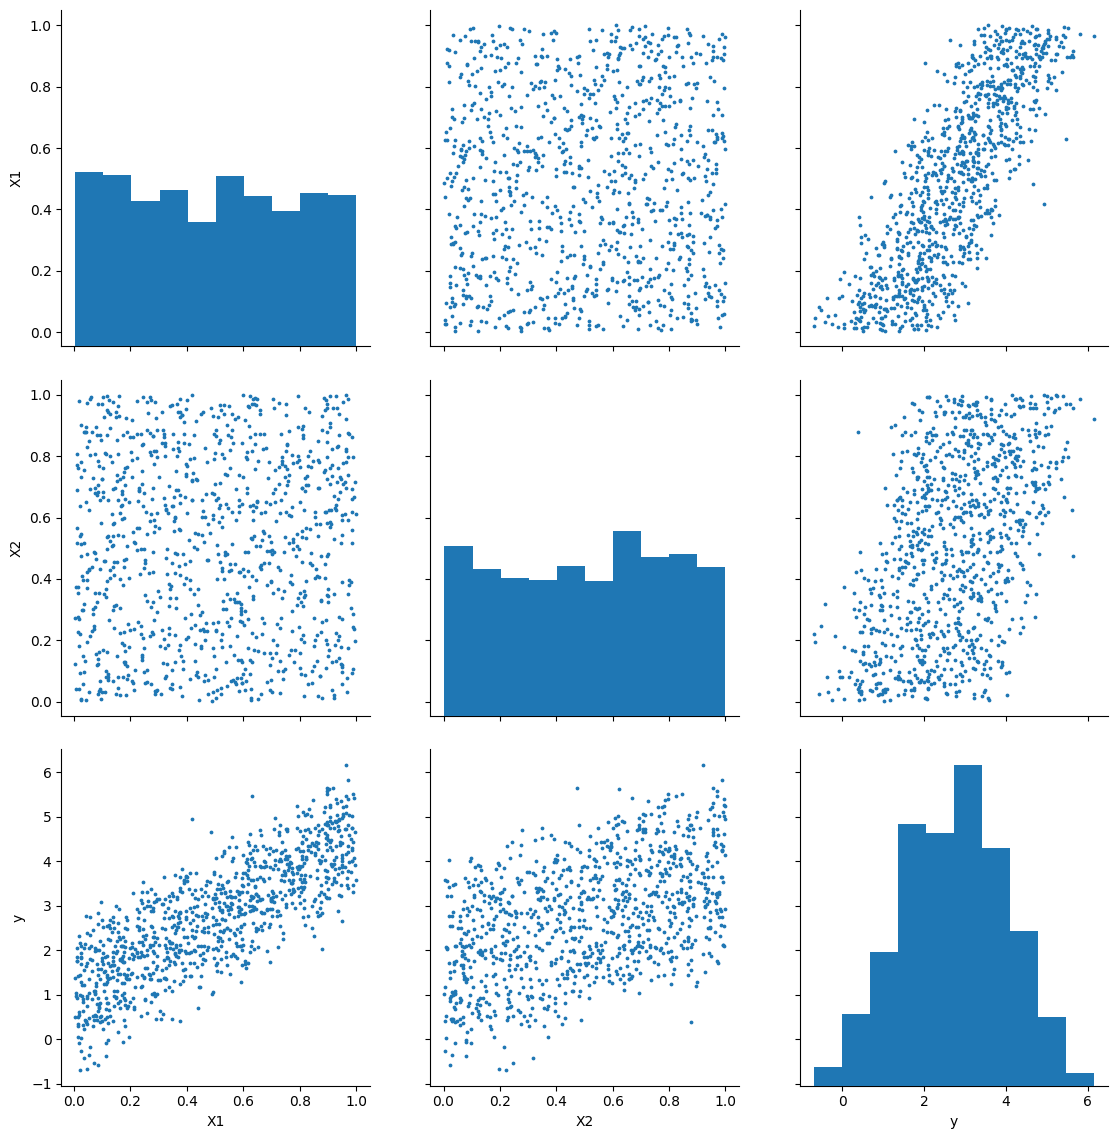

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(42)
X1 = np.random.rand(1000)
X2 = np.random.rand(1000)
y = 3.5 * X1 + 2.0 * X2 + np.random.randn(1000) * 0.5  # true parameters are 3.5 and 2.0

# Create a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Split the data into training and testing sets
X = df[['X1', 'X2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)


Here, we fit a multiple linear regression to the training data. 

#### Multiple Linear Regression: An overview.

A linear regression is a parametric modelling method, making an explicit prediction of the model. In our case, we assume the model is linear in the whole parameter space, i.e. if we have a guess of initial parameters ${\hat{\beta}}$ (a hat denotes an estimate), and the true relationship is assumed to have true linear parameters ${\beta}$, where the vector is just a representation ${\beta} = \beta_i$ where $\beta_i \in \mathbb{Z}$. The true function is:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p.$$

However, we can only approximate this, so our guesses all follow the form

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 X_1 +  \hat{\beta}_2 X_2 + ... + \hat{\beta}_p X_p + \varepsilon.$$

where each "guess" parameter describes the linear relationship between $X_i$ and there is a y-intercept parameter $\beta_0$ and an error term $\varepsilon$. There is no way to remove this error, even with a very high number of degrees of freedom, this error can only be minimised. This error has $\mathbb{E}[\varepsilon] = 0$ with $\mathrm{Var}[\varepsilon] = \sigma^2$. 

Most statistical methods are based on minimising some error parameter, the linear regression employed here in `sklearn`'s `LinearRegression` is no different, we are trying to find ${\hat{\beta}}$ that minimises the sum of the squared errors, often known as the residuals

#### Ordinary Least Squares (OLS) Method

Ordinary least squares is employed in sklearn to estimate the parameters' coefficients. This minimises the residual sum of squares, simplified as:

$$ \mathrm{RSS}(\hat{\beta}) = \sum_{i=1}^n (y_i- \hat{y}_i)^2.$$

Where $n$ is the number of observations found. This can be calculated through matrices:

1. let $\mathbf{\hat{y}}$ be the $n \times 1$ vector of observations.
2. let $\mathbf{X}$ be the $n \times (p+1)$ matrix of independent variables, +1 for the intercept.
3. let $\hat{\beta}$ be the $(p+1) \times 1$ vector of coeffs.

This means the estimation cna be written as:
$\mathbf{\hat{y}} = \mathbf{X}\hat{\beta} + \varepsilon_{(vector)}$

So the RSS can be written as:

$$ \mathrm{RSS}(\hat{\beta}) = (\mathbf{y}-\mathbf{X}\hat{\beta})^\top(\mathbf{y}-\mathbf{X}\hat{\beta})$$

We wish to minimise this with respect to the parameters' vectors. Let us take this derivative:

$$\frac{\partial}{\partial\beta}\mathrm{RSS} = -2 \mathbf{X}^\top(\mathbf{y}-\mathbf{X}\beta)=0$$

As is usual for minimising calculations. In many questions, there is no analytical solution to this, and therefore this target must be minimised using some computational method (typically RK4 methods). However OLS has an analytical solution:

$$\mathbf{X}^\top\mathbf{y} - \mathbf{X}^\top\mathbf{X}\beta = 0\\$$
$$\mathbf{X}^\top\mathbf{y} = \mathbf{X}^\top\mathbf{X}\beta$$

and assuming $\beta$ is invertible:

$$\beta = (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$$




Let us verify this calculation using a basic example, take a data matrix, and an observation matrix:

$$ \mathbf{X} = \begin{bmatrix} 1 & 2\\ 2& 1\end{bmatrix}$$

$$\mathbf{y} = \begin{bmatrix} 3\\2 \end{bmatrix}$$

$$\mathbf{X}^\top\mathbf{X} = \begin{bmatrix} 5&4\\4&5 \end{bmatrix}$$

$$(\mathbf{X}^\top\mathbf{X})^{-1} = \begin{bmatrix} 0.555&-0.444\\-0.444&0.555 \end{bmatrix}$$

$$\mathbf{X}^\top\mathbf{y} = \begin{bmatrix} 3\\2 \end{bmatrix}$$

Gives us a $\beta$:

$$\beta = \begin{bmatrix}0.333\\1.333 \end{bmatrix}$$

so $\beta_1=0.333$ and $\beta_2 = 1.333$

Let us see if `sklearn` agrees:

In [2]:
# Example data without intercept
X_final = np.array([[1, 2], [2, 1]])
y_final = np.array([3, 2])

# Fit the model without intercept
model_final = LinearRegression(fit_intercept=False)
model_final.fit(X_final, y_final)

# Get the coefficients
coefficients_final = model_final.coef_
coefficients_final


array([0.33333333, 1.33333333])

This method is now applied to our data, a $2\times 100$ matrix of predictors, and the vector of the train response.

In [3]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Coefficients: [3.52281005 1.98887017]
Intercept: -0.00967686131628076


When minimising multiple parameters, we can get a model for the signal, this model is represented as a $plane$ in the space, displayed below.

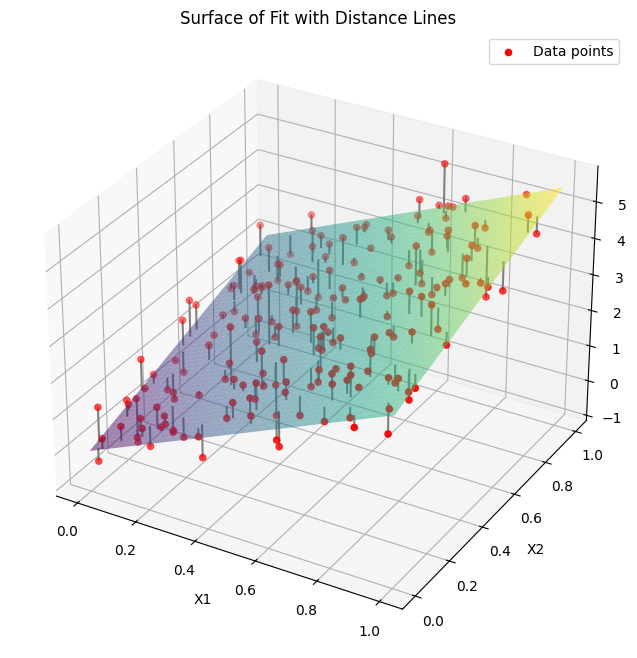

In [4]:


# Create meshgrid for plotting surface
X1_range = np.linspace(0, 1, 100)
X2_range = np.linspace(0, 1, 100)
X1_surf, X2_surf = np.meshgrid(X1_range, X2_range)
y_surf = intercept + coefficients[0] * X1_surf + coefficients[1] * X2_surf

# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_surf, X2_surf, y_surf, alpha=0.5, cmap='viridis')

# Plot the data points and the distance lines
ax.scatter(X_test['X1'], X_test['X2'], y_test, color='red', label='Data points')
for i in range(len(X_test)):
    ax.plot([X_test['X1'].iloc[i], X_test['X1'].iloc[i]], 
            [X_test['X2'].iloc[i], X_test['X2'].iloc[i]], 
            [y_test.iloc[i], intercept + coefficients[0] * X_test['X1'].iloc[i] + coefficients[1] * X_test['X2'].iloc[i]], 
            color='gray')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Surface of Fit with Distance Lines')
plt.legend()
plt.show()


#### Errors and parameter space

This section of the notebook discusses the MSE, its relation to the model selected and how we can display the dependencies of the linear model we have used.


MSE is a common metric of error for statistical learning methods, this can be seen as the average of the RSS

$$ \mathrm{MSE}(\hat{\beta}) = \frac{1}{n}\sum_{i=1}^n (y_i- \hat{y}_i)^2.$$

And so, when considering the MSE, we are effectively looking at the same thing as the RSS, save for a scale factor, however this normalisation ensures that the number seen is easier to interpret. In fact, minimising the MSE gives the OLS solution directly.

MSE is the metric for evaluating the performance of most every regression model, describing how well the new data performs with the current model.

In [5]:
print(mean_squared_error(y_test, model.predict(X_test)))
print(mean_squared_error(y_train, model.predict(X_train)))

0.2508805679762746
0.2362581161588107


Generally, a low test MSE is desired, and the train MSE is usually largely irrelevant due to the fact that it is either directly or indirectly minimised via the method being employed. However, it can be used for analysis on problems such as overfitting. For example, if the model has too many degrees of freedom, the model may use these degrees of freedom to intuit relationships that simply do not exist, so by checking if the test MSE is unreasonably small, for example `1e-9`, it could point to this issue.

Below we generate a "parameter space" by generating a set of hyperparameters $\theta_0,\theta_1$ and filling them between "reasonable" values, which are selected here based on the true values, which we are already aware of. By creating a contour plot, showing contours of set MSE values, we can visualise how sensitive the model is to changes in parameters. For example, if a large jump in MSE is seen between a very low MSE, such as 0.2, and a very high MSE like 10.0, we know that a small change in parameters can lead to a very large jump in error. This could indicate that the current model is rather unstable and a different model should be used.

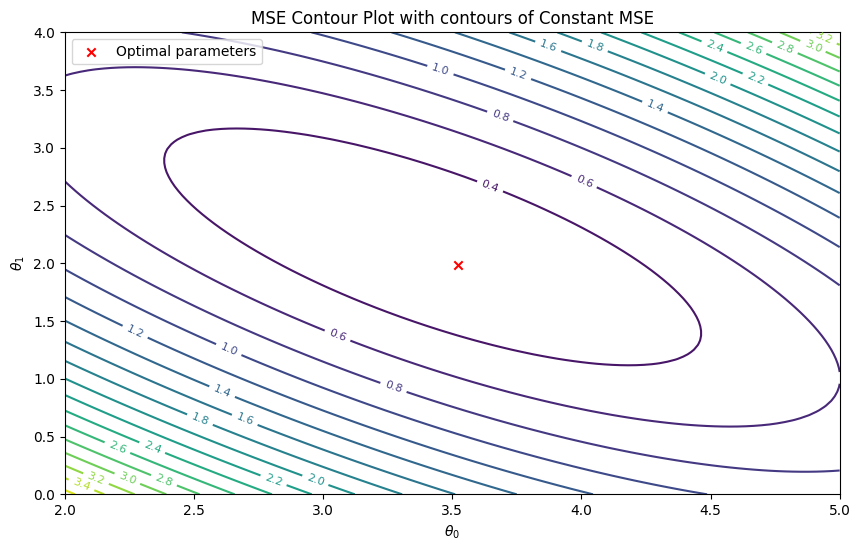

In [6]:
# Create a grid of parameter values
theta0_range = np.linspace(2, 5, 100)
theta1_range = np.linspace(0, 4, 100)
theta0, theta1 = np.meshgrid(theta0_range, theta1_range)
mse_values = np.zeros_like(theta0)

# Compute the MSE for each combination of theta0 and theta1
for i in range(theta0.shape[0]):
    for j in range(theta0.shape[1]):
        y_pred = theta0[i, j] * X_test['X1'] + theta1[i, j] * X_test['X2']
        mse_values[i, j] = mean_squared_error(y_test, y_pred)

# Plot the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contour(theta0, theta1, mse_values, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('MSE Contour Plot with contours of Constant MSE')
plt.scatter(coefficients[0], coefficients[1], color='red', marker='x', label='Optimal parameters')
plt.legend()
plt.show()


Any contour is a representation of a 3D space into a 2d plot, simply showing levels of equal "height" as contour lines. It is much easier to parse than the 3D plot, as sensitivity can simply be understood as "distance between countours".Below the full MSE surface is plotted, note that where the contours are nearby above, the surface gets a much steeper gradient, showing the model's instability as we move away from the minimum, 

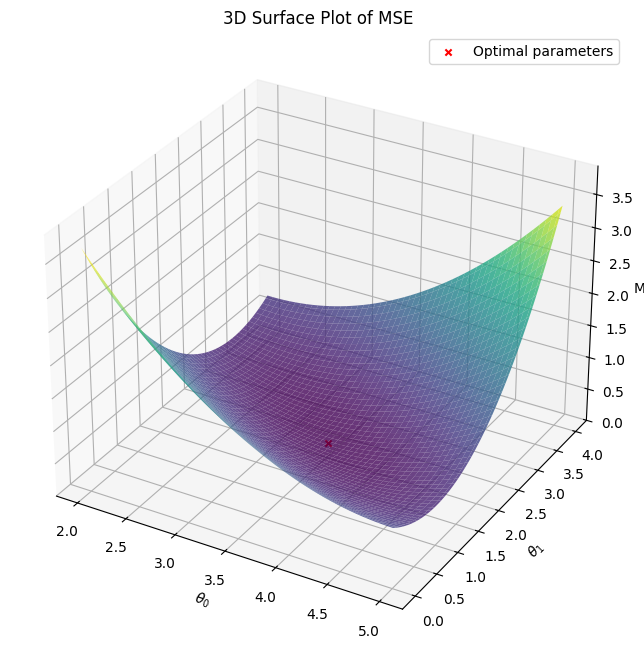

In [7]:
# Plot the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(theta0, theta1, mse_values, cmap='viridis', edgecolor='none', alpha=0.8)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
ax.set_zlabel('MSE')
ax.set_title('3D Surface Plot of MSE')
ax.scatter(coefficients[0], coefficients[1], mean_squared_error(y_test, model.predict(X_test)), color='red', marker='x', label='Optimal parameters')
ax.legend()
plt.show()


This notebook documents a basic multiple linear regression, justifying its use, generating some data and demonstrating how a OLS regression is calculated, performing a small OLS by hand, as well as performing one on the larger dataset. The model's sensitivity is probed using a contour plot. Libraries used: numpy,matplotlib,sklearn,pandas,seaborn. If you are missing any of these dependencies, the below command should be put into either your miniconda/anaconda terminal, or your machine terminal:

```pip install numpy,matplotlib,sklearn,pandas,seaborn```

By Abhishek Dey.